# Tuning process noise of UKF based on NIS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## When overestimating process noise

We will first analyse the first results where we overestimate the process noise:
- std_a_ = 30
- std_yawdd_ = 30

In [23]:
# Load data generated by C++ script
df = pd.read_csv('./build/overestimating_noise.txt', sep='\t')

# Remove last row containing only prediction
df.drop(df.tail(1).index, inplace=True)

# Show some data
df.head()

,time_stamp,px_state,py_state,v_state,yaw_angle_state,yaw_rate_state,sensor_type,NIS,px_measured,py_measured,px_ground_truth,py_ground_truth,vx_ground_truth,vy_ground_truth,rmse_x,rmse_y,rmse_vx,rmse_vy
0,1477010443000000,0.312243,0.580340,0.00000,0.000000e+00,0.000000,lidar,0.000000,0.312243,0.580340,0.600000,0.600000,5.19994,0.000000,0.287757,0.019660,5.19994,0.000000
1,1477010443050000,0.655023,0.547004,8.97812,-2.122740e-17,0.000000,radar,28.159300,0.862916,0.534212,0.859997,0.600045,5.19975,0.001797,0.249819,0.039999,4.54508,0.001271
2,1477010443100000,1.161940,0.489868,8.99529,-1.013020e-01,-0.024770,lidar,0.155642,1.173850,0.481073,1.119980,0.600225,5.19943,0.005390,0.205409,0.071597,4.29636,0.528316
3,1477010443150000,1.224630,0.546662,8.53697,9.420320e-02,0.104484,radar,2.028540,0.969149,0.397513,1.379960,0.600629,5.19898,0.010778,0.194104,0.067622,4.07023,0.605187
4,1477010443200000,1.633870,0.598652,8.59219,1.454500e-01,0.246755,lidar,0.079274,1.650630,0.624690,1.639900,0.601347,5.19839,0.017960,0.173633,0.060495,3.92880,0.770902


### Getting NIS values for RADAR

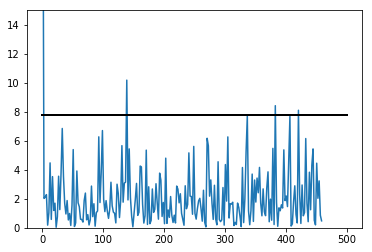

In [24]:
radar_measurements = df.loc[df['sensor_type'] == 'radar']
plt.plot(radar_measurements['NIS'],)

plt.plot([0, 500], [7.815, 7.815], 'k-', lw=2)
axes = plt.gca()
axes.set_ylim([0,15])
plt.show()

### Getting NIS values for LIDAR

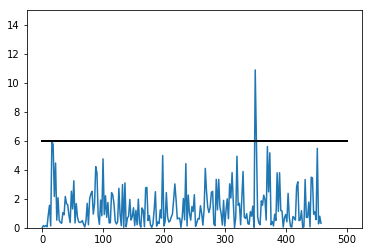

In [25]:
lidar_measurements = df.loc[df['sensor_type'] == 'lidar']
plt.plot(lidar_measurements['NIS'],)

plt.plot([0, 500], [5.991, 5.991], 'k-', lw=2)
axes = plt.gca()
axes.set_ylim([0,15])
plt.show()

Analyzing the NIS values may help us to determine that we overestimated the uncertainty in the system. At least 5% of the values should be above the 95% line. Our measurements may be more accurate than what we initially predicted.

### Final RMSE

In [26]:
rmse1 = df.tail(1).iloc[:, -4:]
rmse1

,rmse_x,rmse_y,rmse_vx,rmse_vy
459,0.094346,0.120024,0.861824,0.942966


## When underestimating process noise

We will first analyse the first results where we overestimate the process noise:
- std_a_ = 0.1
- std_yawdd_ = 0.1

In [27]:
# Load data generated by C++ script
df = pd.read_csv('./build/underestimating_noise.txt', sep='\t')

# Remove last row containing only prediction
df.drop(df.tail(1).index, inplace=True)

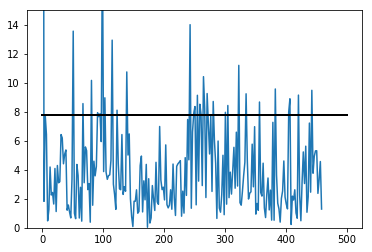

In [28]:
radar_measurements = df.loc[df['sensor_type'] == 'radar']
plt.plot(radar_measurements['NIS'],)

plt.plot([0, 500], [7.815, 7.815], 'k-', lw=2)
axes = plt.gca()
axes.set_ylim([0,15])
plt.show()

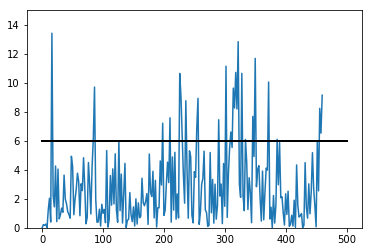

In [29]:
lidar_measurements = df.loc[df['sensor_type'] == 'lidar']
plt.plot(lidar_measurements['NIS'],)

plt.plot([0, 500], [5.991, 5.991], 'k-', lw=2)
axes = plt.gca()
axes.set_ylim([0,15])
plt.show()

In this case, significantly more than 5% of the values are located above the 95% line. We are clearly underestimating the uncertainty in our system.

### Final RMSE

In [30]:
rmse2 = df.tail(1).iloc[:, -4:]
rmse2

,rmse_x,rmse_y,rmse_vx,rmse_vy
460,0.126603,0.130499,0.432182,0.303863


## When tunning process noise

We will first analyse the first results where we overestimate the process noise:
- std_a_ = 1
- std_yawdd_ = 0.8

In [61]:
# Load data generated by C++ script
df = pd.read_csv('./build/tuning_NIS.txt', sep='\t')

# Remove last row containing only prediction
df.drop(df.tail(1).index, inplace=True)

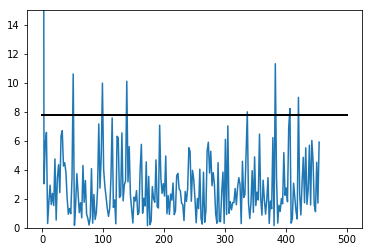

In [62]:
radar_measurements = df.loc[df['sensor_type'] == 'radar']
plt.plot(radar_measurements['NIS'],)

plt.plot([0, 500], [7.815, 7.815], 'k-', lw=2)
axes = plt.gca()
axes.set_ylim([0,15])
plt.show()

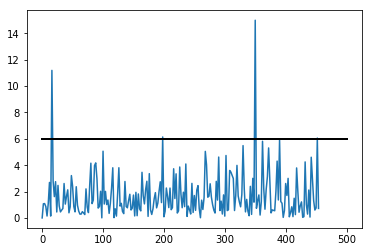

In [63]:
lidar_measurements = df.loc[df['sensor_type'] == 'lidar']
plt.plot(lidar_measurements['NIS'],)

plt.plot([0, 500], [5.991, 5.991], 'k-', lw=2)

plt.show()

### Final RMSE

In [64]:
rmse3 = df.tail(1).iloc[:, -4:]
rmse3

,rmse_x,rmse_y,rmse_vx,rmse_vy
455,0.064845,0.083446,0.333701,0.23869


# Comparing RMSE results

In [65]:
frames = [rmse1, rmse2, rmse3]

result = pd.concat(frames, ignore_index=True)

df = pd.DataFrame()
df['Name'] = ['Overestimating noise', 'Underestimating noise', 'Tuning noise parameters']

frames = [df, result]
result = pd.concat(frames, axis=1)
result

,Name,rmse_x,rmse_y,rmse_vx,rmse_vy
0,Overestimating noise,0.094346,0.120024,0.861824,0.942966
1,Underestimating noise,0.126603,0.130499,0.432182,0.303863
2,Tuning noise parameters,0.064845,0.083446,0.333701,0.238690


# END